In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Análise Preditiva Avançada, Parte II (Deep Learning)

## Trabalho em Grupo
- **Curso:** FGV MBA - Business Analytics e Big Data
- **Disciplina:** Análise Preditiva Avançada
- **Professor:** Gustavo Mirapalheta
- **Tarefa:** Detecção de pneumonia em imagens de raio X

## Alunos
|Github|Kaggle|Nome|Matricula|E-mail|
|---|---|---|---|---|
|<a href="https://github.com/DanielFCampos"><img src="https://avatars2.githubusercontent.com/u/31582602?s=460&v=4" title="DanielFCampos" width="40" height="40"></a>|<a href="https://www.kaggle.com/danielferrazcampos"><img src="https://storage.googleapis.com/kaggle-avatars/images/3508055-kg.png" title="DanielFCampos" width="40" height="40"></a>|Daniel Campos|A57635769|[daniel.ferraz.campos@gmail.com](daniel.ferraz.campos@gmail.com)|
|<a href="https://github.com/ldaniel"><img src="https://avatars2.githubusercontent.com/u/205534?s=460&v=4" title="ldaniel" width="40" height="40"></a>|<a href="https://www.kaggle.com/leandrodaniel"><img src="https://storage.googleapis.com/kaggle-avatars/images/3415144-gr.jpg" title="ldaniel" width="40" height="40"></a>|Leandro Daniel|A57622988|[contato@leandrodaniel.com](contato@leandrodaniel.com)|
|<a href="https://github.com/RodriGonca"><img src="https://avatars2.githubusercontent.com/u/50252438?s=460&v=4" title="RodriGonca" width="40" height="40"></a>|<a href="https://www.kaggle.com/rodrigonca"><img src="https://storage.googleapis.com/kaggle-avatars/images/3511253-kg.png" title="RodriGonca" width="40" height="40"></a>|Rodrigo Goncalves|A57566093|[rodrigo.goncalves@me.com](rodrigo.goncalves@me.com)|
|<a href="https://github.com/ygorlima1"><img src="https://avatars2.githubusercontent.com/u/52429828?s=460&v=4" title="ygorlima1" width="40" height="40"></a>|<a href="https://www.kaggle.com/ygorlima1"><img src="https://storage.googleapis.com/kaggle-avatars/images/3427786-kg.jpg" title="ygorlima1" width="40" height="40"></a>|Ygor Lima|A57549661|[ygor_redesocial@hotmail.com](ygor_redesocial@hotmail.com)|

## Enunciado

**Trabalho em grupo de 3 a 4 alunos envolvendo técnicas de aprendizado supervisionado de máquina com Deep learning.**

### Possíveis trabalhos
- Classificação ou Previsão, Dados Numéricos ou Categóricos, Estilo de problema similar às Regressões Logística ou Linear;
- Principalmente no caso de processamento de texto em linguagem natural;
- Classificação de imagens com Redes Convolutivas;
- Previsão de Texto com Redes Sequenciais;
- Geração de conteúdo (música por exemplo) com redes Auto-Generativas;
- Mix de estilos artísticos com Redes Convolutivas / Auto-Generativas.

### Material a ser entregue
- Se fizer em Python (recomendado): Jupyter Notebook com base e resultados (no caso de dados não submetidos à confidencialidade) ou apenas o Jupyter Notebook (com algumas referências de dados que possam "validar" o modelo de rede neural entregue).
- Se fizer em R: Entregar a base de dados e o Rmarkdown. As bibliotecas de machine ;learning mais utilizadas (scikit-learn, tensorflow e keras) estão disponíveis também no R, porém com um print-end. É necessário instalar o Python para executalas.

### Data de entrega: 25/05

## Escolha da Análise e Abordagem do Grupo

Optamos por desenvolver, em Python, uma Rede Neural Convolutiva (ou Convolucional) para classificar imagens de raio-x com ou sem pneumonia.

Dentro da área de estudo do Deep Learning, temos a chamada CNN (do inglês, Convolutional Neural Network) como um tipo específico de rede neural normalmente utilizada para classificação de imagens.

Uma imagem preta e branca (grayscale) é representada como uma matrix 2D, em que cada posição da matrix representa um pixel da imagem. Os valores para cada elemento variam entre 0 (preto) até 255 (branco). Já uma imagem colorida, é normalmente representada por uma matrix 3D de forma que seja possível armazenar uma combinação das cores vermelho, verde e azul (RGB do inglês). Neste contexto, uma CNN pode ser dividida em duas partes: extração de características (Conv, Padding, Relu, Pooling) e uma rede neural tradicional.

Matematicamente, uma convolução é uma operação linear que a partir de duas funções, gera uma terceira (normalmente chamada de feature map). No contexto de imagens, podemos entender esse processo como um filtro/kernel que transforma uma imagem de entrada.

Durante o desenvolvimento deste trabalho, procuramos aplicar os conceitos de CNN a imagens de raios X de tórax de pacientes com o objetivo de identificar a presença de pneumonia.

# Desenvolvimento e Análise

## Descrição do Dataset Utilizado

### **Exemplos ilustrativos de raios X de tórax em pacientes com pneumonia**

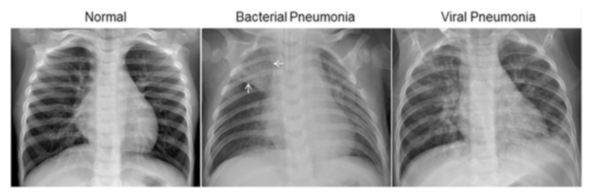


A radiografia normal do tórax (painel esquerdo) mostra pulmões limpos, sem áreas de opacificação anormal na imagem. A pneumonia bacteriana (média) geralmente exibe uma consolidação lobar focal, neste caso no lobo superior direito (setas brancas), enquanto a pneumonia viral (direita) se manifesta com um padrão mais difuso de 'intersticial' em ambos os pulmões.

### **Estrutura dos Dados**

O conjunto de dados está organizado em 3 pastas (Treino, Teste, Validação) e contém subpastas para cada categoria de imagem (Pneumonia / Normal).

Existem 5.883 imagens de raios-X (JPEG) e 2 categorias (Pneumonia / Normal).

As imagens de radiografia de tórax (ântero-posterior) foram selecionadas a partir de cortes de pacientes pediátricos de um a cinco anos no Centro Médico de Mulheres e Crianças de Guangzhou, Guangzhou. 

Todas as radiografias de tórax foram realizadas como parte dos cuidados clínicos de rotina dos pacientes.

Para a análise de imagens de raio-x do tórax, todas as imagens rastreadas para controle de qualidade, removendo todas as imagens de baixa qualidade ou ilegíveis. 

Os diagnósticos para as imagens foram classificados por dois médicos especialistas.

## Libraries Utilizadas para Desenvolvimento da Análise

In [2]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

import cv2 as cv
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


## Data Preparation

A preparação de dados é o ato de manipular e transformar dados brutos em uma forma que pode ser analisada por algoritmos de Deep Learning.

Para este projeto vamos criar uma função que faz a leitura das imagens em uma matriz quadrada de tamanho 256 x 256 em greyscale, com o respectivo label indicando se a radiografia é de um paciente NORMAL (0) ou com PNEUMONIA (1).


In [3]:
image_size = 256
labels = ['NORMAL', 'PNEUMONIA']

def get_data(data_dir):
        
    images = []
    
# cria uma lista com o index de cada label com base no nome da raíz do diretório informado.
    for label in labels:
        dir = os.path.join(data_dir, label)
        class_num = labels.index(label)
        
# percorre todas as imagens presentes no diretório, converte para grey_sacale e faz o resizing das imagens.
        for image in os.listdir(dir):    
            image_read = cv.imread(os.path.join(dir,image), cv.IMREAD_GRAYSCALE)
            image_resized = cv.resize(image_read, (image_size, image_size))
            images.append([image_resized, class_num])

    return np.array(images)

train       = get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/train')
test        = get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/test')
validation  = get_data('/kaggle/input/chest-xray-pneumonia/chest_xray/val')


Na sequência avaliamos as quantidades de observações em cada dataset (Treino, Teste e Validação).

In [4]:
print('\nQuantidade de imagens no dataset de treino:\t', len(train), 
      '\tcom o fomato: ', train.shape, 
      '\nNORMAL:', np.count_nonzero(train[:,1] == 0),
      '\tPNEUMONIA:', np.count_nonzero(train[:,1] == 1))

print('\nQuantidade de imagens no dataset de teste:\t', len(test), 
      '\tcom o fomato: ', test.shape,
      '\nNORMAL:', np.count_nonzero(test[:,1] == 0),
      '\tPNEUMONIA:', np.count_nonzero(test[:,1] == 1))

print('\nQuantidade de imagens no dataset de validação:\t', len(validation), 
      '\tcom o fomato: ', validation.shape,
      '\nNORMAL:', np.count_nonzero(validation[:,1] == 0),
      '\tPNEUMONIA:', np.count_nonzero(validation[:,1] == 1))


Quantidade de imagens no dataset de treino:	 5216 	com o fomato:  (5216, 2) 
NORMAL: 1341 	PNEUMONIA: 3875

Quantidade de imagens no dataset de teste:	 624 	com o fomato:  (624, 2) 
NORMAL: 234 	PNEUMONIA: 390

Quantidade de imagens no dataset de validação:	 16 	com o fomato:  (16, 2) 
NORMAL: 8 	PNEUMONIA: 8


Agora podemos observar um conjunto de imagens presentes no dataset de treinamento.

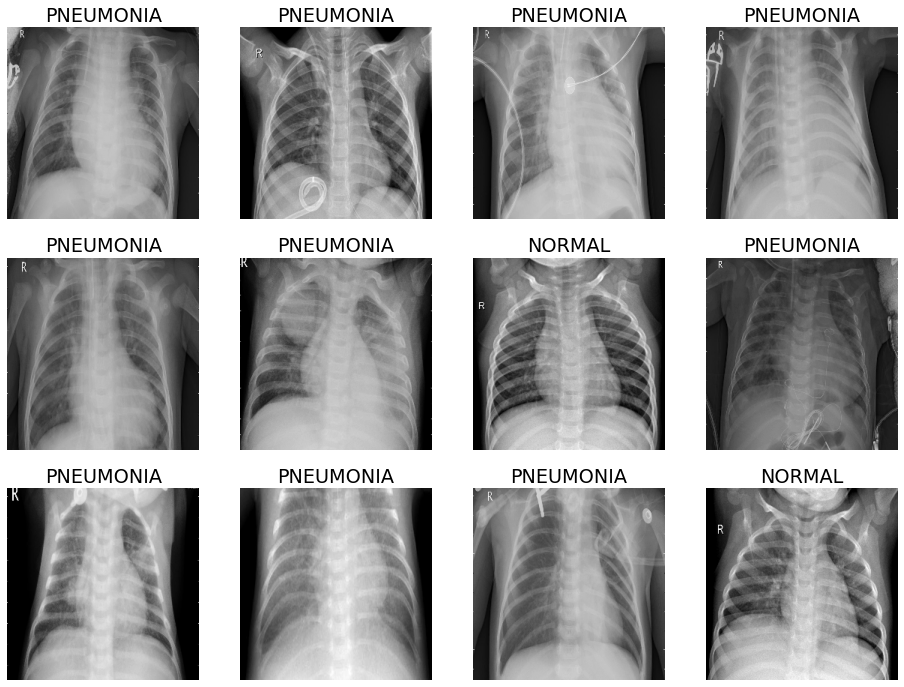

In [5]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = (16, 12))
columns = 4
rows = 3

for i in range(1, columns * rows + 1):
    rnd = np.random.randint(0, len(train))
    img = train[rnd][0]  
    fig.add_subplot(rows, columns, i)
    plt.title(labels[train[rnd][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')

plt.show()

### Reshaping dos Tensores

Agora necessitamos fazer o reshaping das dimensões dos datasets para serem processados pelos algoritmos de Deep Learning.

Iniciamos por extrair os componentes dos datasets de Treino e Teste carregados anteriormente e consolidados em um único dataset que será separado em datasets de treino e teste.

In [6]:
x_features = []
y_labels = []

for feature, label in train:
    x_features.append(feature)
    y_labels.append(label)
    
for feature, label in test:
    x_features.append(feature)
    y_labels.append(label)
    
for feature, label in validation:
    x_features.append(feature)
    y_labels.append(label)

Abaixo realizamos o reshape dos dados para utilizá-los no treinamento do modelo.

In [7]:
x_features = np.array(x_features).reshape(-1, image_size, image_size, 1)
y_labels = np.array(y_labels)
y_labels = np.expand_dims(y_labels, axis =1)

Finalmente realizamos a separação entre base de teste e treino, na proporção de 80% treinamento e 20% teste.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_features, 
                                                    y_labels,
                                                    stratify = y_labels,
                                                    test_size = 0.2, 
                                                    random_state = 2)

In [9]:
print('\nnovo formato do tensor de features de treinamento:\t', x_train.shape, 
      '\nquantidade:\t', len(x_train), 
      '\tNORMAL:', np.count_nonzero(y_train == 0), 
      '\tPNEUMONIA', np.count_nonzero(y_train == 1))

print('\nnovo formato do tensor de labels de treinamento:\t', y_train.shape, 
      '\nquantidade:\t', len(y_train),
      '\tNORMAL:', np.count_nonzero(y_train == 0), 
      '\tPNEUMONIA', np.count_nonzero(y_train == 1))

print('\nnovo formato do tensor de features de teste:\t\t', x_test.shape, 
      '\nquantidade:\t', len(x_test),
      '\tNORMAL:', np.count_nonzero(y_test == 0), 
      '\tPNEUMONIA', np.count_nonzero(y_test == 1))

print('\nnovo formato do tensor de labels de teste:\t\t', y_test.shape, 
      '\nquantidade:\t', len(y_test),
      '\tNORMAL:', np.count_nonzero(y_test == 0), 
      '\tPNEUMONIA', np.count_nonzero(y_test == 1))


novo formato do tensor de features de treinamento:	 (4684, 256, 256, 1) 
quantidade:	 4684 	NORMAL: 1266 	PNEUMONIA 3418

novo formato do tensor de labels de treinamento:	 (4684, 1) 
quantidade:	 4684 	NORMAL: 1266 	PNEUMONIA 3418

novo formato do tensor de features de teste:		 (1172, 256, 256, 1) 
quantidade:	 1172 	NORMAL: 317 	PNEUMONIA 855

novo formato do tensor de labels de teste:		 (1172, 1) 
quantidade:	 1172 	NORMAL: 317 	PNEUMONIA 855


Para finalizar dividimos as matrizes de features por 255 para normalizar os dados.

In [10]:
x_train = x_train / 255
x_test  = x_test  / 255

## Definição da Arquitetura da Rede Neural

### Criando os Modelos

Primeiramente criamos uma Rede Neural simples em convuluções.

In [11]:
i = Input(x_train.shape[1:])

a = Flatten()(i)

a = Dense(512, activation = 'relu')(a)
a = Dropout(0.4)(a)

a = Dense(512, activation = 'relu')(a)
a = Dropout(0.3)(a)

a = Dense(512, activation = 'relu')(a)
a = Dropout(0.1)(a)

a = Dense(1, activation = 'sigmoid')(a)

model_NN = Model(i,a)

Adicionalmente criamos uma Rede Neural com convuluções para compararmos os resultados com o modelo mais simples acima.

In [12]:
i = Input(x_train.shape[1:])

b = Conv2D(32, (3,3), activation ='relu', padding = 'same')(i)
b = BatchNormalization()(b)
b = Conv2D(32, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = MaxPooling2D(2,2)(b)

b = Conv2D(64, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = Conv2D(64, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = MaxPooling2D(2,2)(b)

b = Conv2D(128, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = Conv2D(128, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = MaxPooling2D(2,2)(b)

b = Conv2D(256, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = Conv2D(256, (3,3), activation ='relu', padding = 'same')(b)
b = BatchNormalization()(b)
b = MaxPooling2D(2,2)(b)

b = Flatten()(b)

b = Dense(512, activation = 'relu')(b)
b = Dropout(0.4)(b)

b = Dense(512, activation = 'relu')(b)
b = Dropout(0.3)(b)

b = Dense(512, activation = 'relu')(b)
b = Dropout(0.1)(b)

b = Dense(1, activation = 'sigmoid')(b)

model_CNN = Model(i, b)

### Compilando e Visualizando a Arquitetura dos Modelos

### Rede Neural Simples

In [13]:
model_NN.compile(optimizer = 'SGD',
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model_NN.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               33554944  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656

### Convolutional Neural Network

In [14]:
model_CNN.compile(optimizer = 'SGD',
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

model_CNN.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      1849

### Data Augmentation

Data augmentation é uma estratégia que permite que se aumente significativamente a diversidade de dados disponíveis para treinamento de modelos de machine learning, sem realmente coletar novos dados. Técnicas de data augmentation, como corte, preenchimento e inversão horizontal, são comumente usadas para treinar grandes redes neurais.

In [15]:
batch_size = 16

train_gen = ImageDataGenerator(rotation_range = 10,
                               horizontal_flip = True,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1.,
                               zoom_range = 0.2,
                               fill_mode = 'nearest',
                               cval = 0)

train_generator_NN = train_gen.flow(x_train, y_train, batch_size)
train_generator_CNN = train_gen.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size

checkpoint_NN = ModelCheckpoint('model_NN.h5', 
                                monitor = 'val_loss', 
                                verbose = 0, 
                                save_best_only = True, 
                                mode = 'auto')

checkpoint_CNN = ModelCheckpoint('model_CNN.h5', 
                                 monitor = 'val_loss', 
                                 verbose = 0, 
                                 save_best_only = True, 
                                 mode = 'auto')


## Treinamento dos Modelos

Primeiramente iniciamos com o modelo de Rede Neural simples.

In [16]:
epochs = 80

In [17]:
history_NN = model_NN.fit(train_generator_NN, 
                          validation_data = (x_test, y_test), 
                          steps_per_epoch = steps_per_epoch, 
                          epochs = epochs,
                          callbacks = [checkpoint_NN])

Train for 292 steps, validate on 1172 samples
Epoch 1/80
292/292 [==============================] - 23s 78ms/step - loss: 0.6166 - accuracy: 0.7192 - val_loss: 0.6137 - val_accuracy: 0.7295
Epoch 2/80
292/292 [==============================] - 22s 77ms/step - loss: 0.5534 - accuracy: 0.7299 - val_loss: 0.5752 - val_accuracy: 0.7295
Epoch 3/80
292/292 [==============================] - 22s 74ms/step - loss: 0.5219 - accuracy: 0.7299 - val_loss: 0.4736 - val_accuracy: 0.7295
Epoch 4/80
292/292 [==============================] - 22s 75ms/step - loss: 0.5032 - accuracy: 0.7301 - val_loss: 0.4682 - val_accuracy: 0.7295
Epoch 5/80
292/292 [==============================] - 23s 77ms/step - loss: 0.4975 - accuracy: 0.7286 - val_loss: 0.4199 - val_accuracy: 0.7295
Epoch 6/80
292/292 [==============================] - 22s 74ms/step - loss: 0.4848 - accuracy: 0.7603 - val_loss: 0.3746 - val_accuracy: 0.8558
Epoch 7/80
292/292 [==============================] - 21s 72ms/step - loss: 0.4736 - accur

Na sequencia seguimos com o treinamento de nossa Convolutional Neural Network.

In [18]:
history_CNN = model_CNN.fit(train_generator_CNN, 
                            validation_data = (x_test, y_test), 
                            steps_per_epoch = steps_per_epoch, 
                            epochs = epochs,
                            callbacks = [checkpoint_CNN])

Train for 292 steps, validate on 1172 samples
Epoch 1/80
292/292 [==============================] - 38s 129ms/step - loss: 0.4269 - accuracy: 0.8378 - val_loss: 2.0427 - val_accuracy: 0.7295
Epoch 2/80
292/292 [==============================] - 32s 110ms/step - loss: 0.2409 - accuracy: 0.9040 - val_loss: 0.2472 - val_accuracy: 0.9019
Epoch 3/80
292/292 [==============================] - 32s 109ms/step - loss: 0.2289 - accuracy: 0.9081 - val_loss: 0.3627 - val_accuracy: 0.8302
Epoch 4/80
292/292 [==============================] - 32s 109ms/step - loss: 0.2081 - accuracy: 0.9214 - val_loss: 0.5416 - val_accuracy: 0.7406
Epoch 5/80
292/292 [==============================] - 34s 116ms/step - loss: 0.1891 - accuracy: 0.9282 - val_loss: 0.1555 - val_accuracy: 0.9480
Epoch 6/80
292/292 [==============================] - 33s 113ms/step - loss: 0.1889 - accuracy: 0.9312 - val_loss: 0.3068 - val_accuracy: 0.9010
Epoch 7/80
292/292 [==============================] - 33s 112ms/step - loss: 0.1746 

## Performance do Modelo

Uma **Loss function** é usada para otimizar um algoritmo de aprendizado de máquina. 

A perda é calculada no treinamento e na validação e sua interpretação é baseada no desempenho do modelo nesses dois conjuntos. 

O valor da perda implica em quão ruim ou bem um modelo se comporta após cada iteração de otimização.

A métrica de acurácia é usada para medir o desempenho do algoritmo de uma maneira interpretável. 

A acurácia de um modelo geralmente é calculada na forma de uma porcentagem. 

É a medida da precisão da comparação da prediçao do modelo com os dados reais.

In [19]:
model_NN = tf.keras.models.load_model('model_NN.h5')
model_CNN = tf.keras.models.load_model('model_CNN.h5')

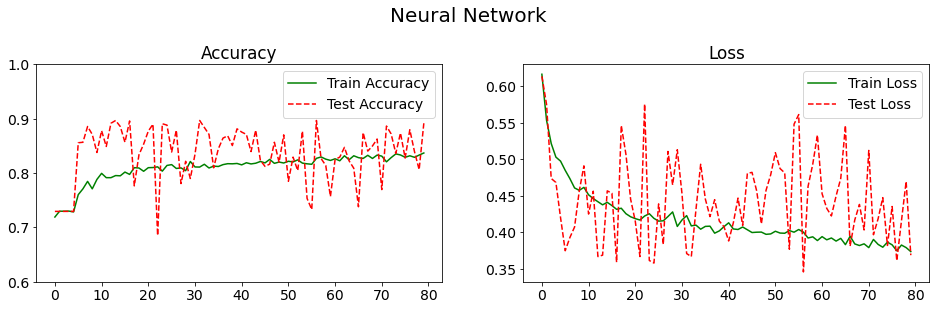

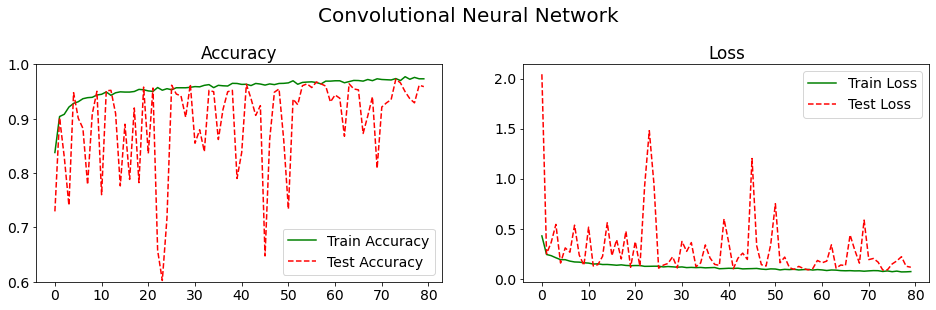

In [20]:
def plot_accuracy_hist(model_history, fig_tittle):

    plt.rcParams.update({'font.size': 14})

    fig = plt.figure(figsize = (16, 4))
    columns = 2
    rows = 1

    fig.suptitle(fig_tittle, fontsize = 20, y = 1.08)
    fig.add_subplot(rows, columns, 1)

    plt.title('Accuracy')
    plt.ylim(0.6, 1)
    
    plt.plot(model_history.history['accuracy'], 
             color='green', 
             label = 'Train Accuracy')

    plt.plot(model_history.history['val_accuracy'], 
             color='red', 
             label = 'Test Accuracy', 
             linestyle='dashed')

    plt.legend()

    fig.add_subplot(rows, columns, 2)

    plt.title('Loss')
    plt.plot(model_history.history['loss'], 
             color='green', 
             label = 'Train Loss')

    plt.plot(model_history.history['val_loss'], 
             color='red', 
             label = 'Test Loss', 
             linestyle='dashed')

    plt.legend()

    plt.show()
    
plot_accuracy_hist(history_NN, 'Neural Network')
plot_accuracy_hist(history_CNN, 'Convolutional Neural Network')

Uma matriz de confusão é uma tabela frequentemente usada para descrever o desempenho de um modelo de classificação (ou "classificador") em um conjunto de dados de teste pelos quais os valores verdadeiros são conhecidos.

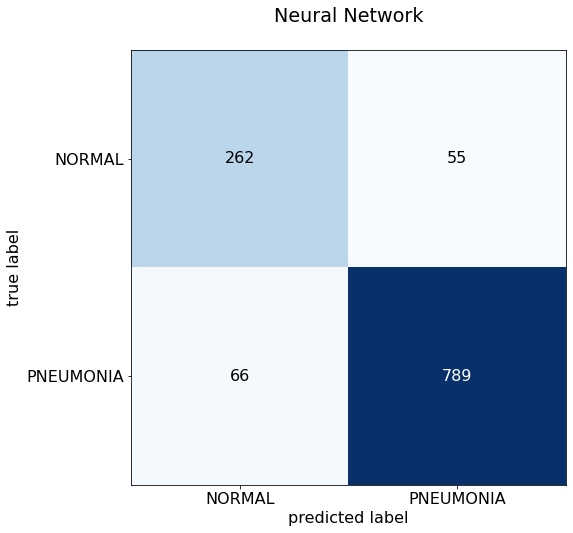

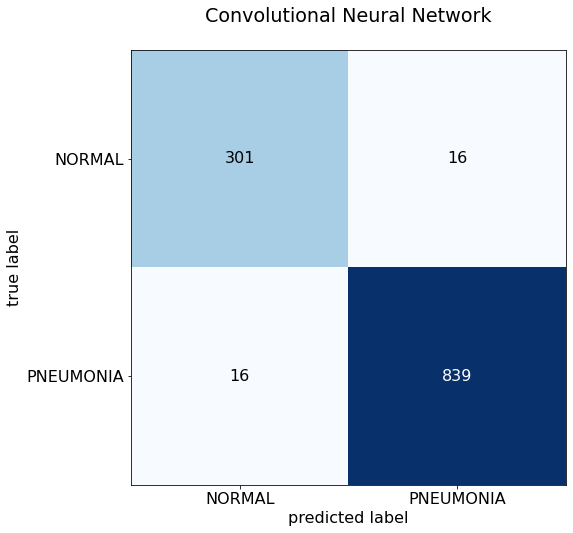

In [21]:
plt.rcParams.update({'font.size': 16})

def plot_confusion_mtx(model, x_test, plot_tittle):
    pred_prob = model.predict(x_test, batch_size = 8)
    pred = np.where(pred_prob > 0.5, 1,0)

    CM = confusion_matrix(y_test, pred)

    plot_confusion_matrix(conf_mat = CM, figsize = (16, 8))
    plt.title(plot_tittle)
    plt.xticks(range(2), labels)
    plt.yticks(range(2), labels)

    plt.show()

plot_confusion_mtx(model_NN, x_test, 'Neural Network')
plot_confusion_mtx(model_CNN, x_test, 'Convolutional Neural Network')
    

**Receiver operating characteristic** é um gráfico que mostra a capacidade de discriminação de um modelo classificador binário à medida que seu limite de classificação muda.

Obtemos esse gráfico plotando a Taxa Positiva Verdadeira (TPR) contra a Taxa Positiva Falsa (FPR) em diferentes configurações de limite.

Quanto maior a Área sob a curva (AUC), melhor o modelo é para classificar a observação.

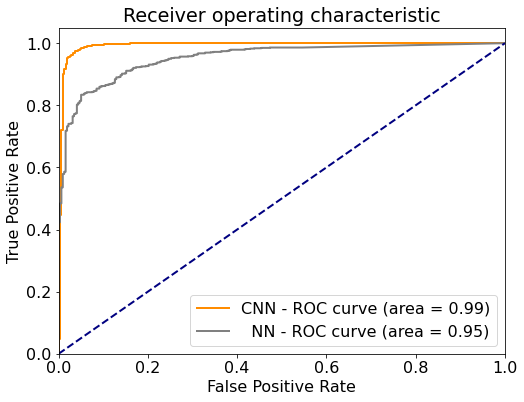

Classificarion Report - Neural Network
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       317
           1       0.93      0.92      0.93       855

    accuracy                           0.90      1172
   macro avg       0.87      0.87      0.87      1172
weighted avg       0.90      0.90      0.90      1172


Classificarion Report - Convolutional Neural Network
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       317
           1       0.98      0.98      0.98       855

    accuracy                           0.97      1172
   macro avg       0.97      0.97      0.97      1172
weighted avg       0.97      0.97      0.97      1172



In [22]:

pred_prob_NN  = model_NN.predict(x_test, batch_size = 8)
pred_prob_CNN = model_CNN.predict(x_test, batch_size = 8)

pred_NN  = np.where(pred_prob_NN > 0.5, 1,0)
pred_CNN = np.where(pred_prob_CNN > 0.5, 1,0)

NN_fpr, NN_tpr, _ = roc_curve(y_test, pred_prob_NN)
NN_roc_auc = auc(NN_fpr, NN_tpr)

CNN_fpr, CNN_tpr, _ = roc_curve(y_test, pred_prob_CNN)
CNN_roc_auc = auc(CNN_fpr, CNN_tpr)

plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = (8, 6))

lw = 2
plt.plot(CNN_fpr,
         CNN_tpr, 
         color = 'darkorange',
         lw = lw, 
         label = 'CNN - ROC curve (area = %0.2f)' % CNN_roc_auc)

plt.plot(NN_fpr,
         NN_tpr, 
         color = 'grey',
         lw = lw, 
         label = '  NN - ROC curve (area = %0.2f)' % NN_roc_auc)

plt.plot([0, 1], [0, 1], 
         color = 'navy', 
         lw = lw, 
         linestyle = '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")

plt.show()

print('Classificarion Report - Neural Network')
print(classification_report(y_test, pred_NN))

print('\nClassificarion Report - Convolutional Neural Network')
print(classification_report(y_test, pred_CNN))


# Conclusão

Nas últimas décadas, técnicas de imagem médica, como tomografia computadorizada (TC), ressonância magnética (RM), tomografia por emissão de pósitrons (PET), mamografia, ultrassom e raio-X, foram utilizadas para a detecção precoce, diagnóstico e tratamento de doenças. Na prática clínica, a interpretação dessas imagens médicas foi realizada principalmente por especialistas, como radiologistas e médicos. No entanto, dadas as grandes variações patológicas e a potencial fadiga desses especialistas, pesquisadores e médicos começaram a se beneficiar de intervenções assistidas por computador. Embora a taxa de progresso na análise computacional de imagens médicas não tenha sido tão rápida quanto a das tecnologias de imagens médicas, essa situação tem melhorando com a introdução de técnicas de aprendizado de máquina.

A modelagem computacional para análise de imagens médicas teve um impacto significativo em aplicações clínicas e na pesquisa científica. Os recentes avanços em *machine learning*, especialmente no que diz respeito ao *deep learning*, lançam uma nova luz sobre a análise de imagens médicas, permitindo a descoberta de padrões morfológicos e/ou texturais em imagens apenas a partir de dados. Os métodos atuais de *deep learning* alcançaram um desempenho de ponta em diferentes aplicações, ajudando a identificar, classificar e quantificar padrões em imagens médicas. No centro desses avanços está a capacidade de explorar representações hierárquicas de informações apenas com dados, em vez de informações manualmente definidas de acordo com conhecimentos do domínio específico.

Uma das fraquezas do aprendizado profundo é a dificuldade em identificar e tratar eventuais vieses na rede quando a complexidade é muito grande. A questão pode ser resolvida com um maior volume de dados, bem como o estudo das relações entre o resultado do modelo e as informações avaliadas (as chamadas *features*). Esta dificuldade é geralmente abordada com a ajuda de especialistas da área na revisão de amostras dos resultados do modelo, principalmente como a avaliação visual das regiões mais relevantes das imagens na  tomada de decisão do modelo.

Outro problema comumente enfrentado é o *overfitting* do modelo. Com redes complexas e profundas este tipo de enfrentamento se torna bastante comum e cada vez mais difíceis de serem detectados, principalmente pelo componente de subjetividade do que é, de fato, um *overfit* de rede. A calibração do parâmetro de *dropout* é uma das formas de minimizar o impacto e a probabilidade de overfitting em redes neurais.

Nossa abordagem aqui apresentada ilustra duas aplicações de *deep learning* na classificação de imagens médicas de raio-X de tórax para a identificação de pneumonia. A primeira rede, mais simples, não contava com as seções convolucionais, simplificando significativamente a arquitetura da rede. A segunda rede incluiu etapas convolucionais, trazendo mais complexidade e profundidade à rede. Os resultados mostram que a etapa convolucional é extremamente importante para a maximização do potencial classificação do modelo, traduzindo em uma diferença de 0.04 na AUROC (Area Under Receiver Operating Characteristics) curve, 0.95 para a rede neural tradicional vs 0.99 para rede neural com etapas convolucionais. O recall, que é a medida que tenta responder qual a proporção de eventos que realmente aconteceram e foram corretamente identificados, teve um incremento de 3pp (94% vs 97%) com a adição das etapas convolucionais. O *recall* mostra quão bom nosso modelo seria na detecção de uma pneumonia e é a métrica mais relevante se quisermos atuar na detecção precoce da pneumonia. A precisão, que tenta responder qual proporção das identificações foi feita corretamente, por sua vez, teve um incremento de 6pp (92% vs 98%). Esta métrica nos diz quanto teríamos de esforço aplicado em identificações erradas e uma ampliação dela diminui o volume de recursos desperdiçados.

Por fim, podemos concluir que aplicações de *deep learning* no auxílio do diagnóstico médico por imagens pode ser eficaz e já é uma realidade nos dias de hoje. O uso dessa técnica traz agilidade ao processo com expressiva acurácia mostrando ser uma alternativa viável, principalmente em serviços clínicos superlotados e com dificuldades de contingente de especialistas.

Desenvolvimentos futuros do projeto apresentado devem incluir a melhoria do processo de seleção de hiperparâmetros, os quais foram manualmente selecionados nessa abordagem. Escolhas mais automatizadas e objetivas da calibração desses parâmetros podem incluir o método de otimização Bayesiana de múltiplos parâmetros, reduzindo o tempo de calibração pela redução do número de iterações e escolhas inteligentes de parâmetros por iteração para maximizar o quanto se aprende a cada passo.


# Referências utilizadas

- [Uma introdução as redes neurais convolucionais utilizando o Keras](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e), por [Alan Melo Clappis](https://medium.com/@clappis)

- [CNN- Tensorflow 2.0 ( F-Score 97%, Recall -98%)](https://www.kaggle.com/arjunsarkar/cnn-tensorflow-2-0-f-score-97-recall-98), por [Arjun Sarkar](https://www.kaggle.com/arjunsarkar)

- [Batch normalization in Neural Networks](https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c), por [FD](https://towardsdatascience.com/@phidaouss)

- [Tensorflow 2.0 API Documentation](https://www.tensorflow.org/api_docs)

- [Scikit-Learn - Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

- [Shen D., Wu G., Suk H. 2017. Deep Learning in Medical Image Analysis. Annual Review of Biomedical Engineering](https://www.annualreviews.org/doi/full/10.1146/annurev-bioeng-071516-044442#_i50)

- [Wang X. et al. 2017.Searching for prostate cancer by fully automated magnetic resonance imaging classification: deep learning versus non-deep learning. Scientific Reports](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5684419/)

- [Chen C. et al. 2020. Deep Learning for Cardiac Image Segmentation: A Review. Frontiers in Cardiovascular Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7066212/)

- [Jo, T., Nho, K., Saykin, A. 2019. Deep Learning in Alzheimer's Disease: Diagnostic Classification and Prognostic Prediction Using Neuroimaging Data. Frontiers in Aging Neuroscience](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6710444/)

- [Classification: Precision and Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)